## Predicting ESRB ratings for Vedio-Games using Machine learning models

In this notebook we will analyze the data which includes many columns about features like “Is there blood in this computer game” or “Are there murders in this game” and ESRB rating for each video game in data frame. In my opinion it is very interesting data, because we can understand how many video games have for example this or that rating. So, let`s start.

# What is ESRB rating?

The Entertainment Software Rating Board (ESRB) is an American self-regulatory organization that assigns age and content ratings to consumer video games. The board assigns ratings to games based on their content, using judgment similar to the motion picture rating systems used in many countries, using a combination of six age-based levels intended to aid consumers in determining a game's content and suitability, along with a system of "content descriptors" which detail specific types of content present in a particular game. The ratings are determined by a combination of material provided by the game's publisher in both questionnaires and video footage of the game, and a review of this material by a panel of reviewers who assign it a rating. The ratings are designed towards parents so they can make informed decisions about purchasing games for their children. Once a game is rated, the ESRB maintains a code of ethics for the advertising and promotion of video games - ensuring that marketing materials for games are targeted to appropriate audiences. (https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

After we learn what is ESRB we can go and try to understand what is letters like E 10+, A, RP and etcetera. 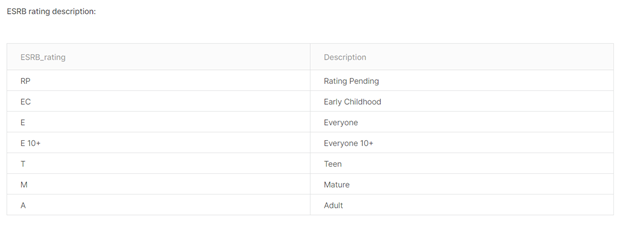

Here we can see all ESRB_rating letters and what they mean. For example, E – everyone. It means that everyone can play this game.

#  Import data and libraries.

After theory we can go to practice. Firstly, lets import all useful libraries. Secondly, load data.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# load data
main_data = pd.read_csv(r"C:\Users\prash\OneDrive\Documents\dataset\VedioGames_ESRP_RATING_Dataset\Video_games_esrb_rating.csv")

#  Exploratory data analysis

Let`s see head of our dataframe and list of columns.

In [3]:
# fast looking (size of dataframe, columns, 5 first rows of data, Nan values)
print("The dataset has " + str(main_data.shape[0]) + " rows.")
print("And " + str(main_data.shape[1]) + " columns atleast.")

print("List of columns: ", main_data.columns)

main_data.head()

The dataset has 1895 rows.
And 34 columns atleast.
List of columns:  Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')


,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


#### After that we can check Nan and null values here.

In [4]:
procent_of_null = main_data.isnull().sum() / main_data.shape[0]
print(procent_of_null)

print("")

procent_of_nan = main_data.isna().sum() / main_data.shape[0]
print(procent_of_nan)

title                       0.0
console                     0.0
alcohol_reference           0.0
animated_blood              0.0
blood                       0.0
blood_and_gore              0.0
cartoon_violence            0.0
crude_humor                 0.0
drug_reference              0.0
fantasy_violence            0.0
intense_violence            0.0
language                    0.0
lyrics                      0.0
mature_humor                0.0
mild_blood                  0.0
mild_cartoon_violence       0.0
mild_fantasy_violence       0.0
mild_language               0.0
mild_lyrics                 0.0
mild_suggestive_themes      0.0
mild_violence               0.0
no_descriptors              0.0
nudity                      0.0
partial_nudity              0.0
sexual_content              0.0
sexual_themes               0.0
simulated_gambling          0.0
strong_janguage             0.0
strong_sexual_content       0.0
suggestive_themes           0.0
use_of_alcohol              0.0
use_of_d

Cool. There aren`t null and nan values, thanks author. 

# Visualizing data.

Text(0.5, 1.0, 'Count of games on different consoles')

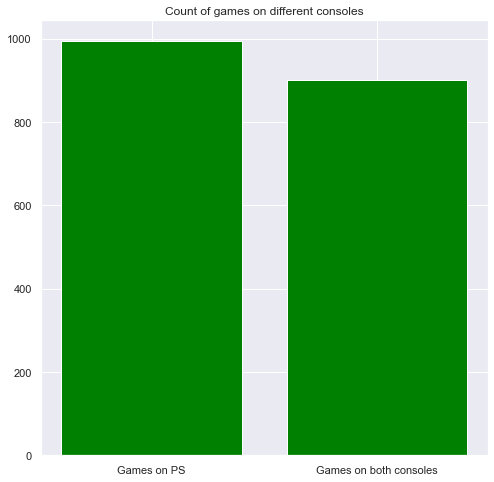

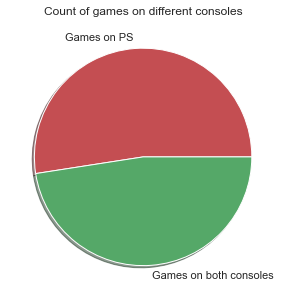

In [5]:
# size
plt.figure(figsize=(8, 8))

# pie and bar graphs
consoles_labels = ["Games on PS", "Games on both consoles"]

playstation = main_data[main_data["console"] == 0]
both_consoles = main_data[main_data["console"] == 1]

consoles_names = [len(playstation), len(both_consoles)]

plt.bar(consoles_labels, consoles_names, color = "green")
plt.title("Count of games on different consoles")

plt.figure(figsize=(19, 5))
plt.pie(consoles_names, labels = consoles_labels, shadow = True, colors = "rgbyc")
plt.title("Count of games on different consoles")

Here we can see that:

• There is a little bit few than 1000 games on PlayStation, but only 900 on both platforms.

• First fact means that there are more playstation`s exclusives than games on both platforms.

• The ratio of PlayStation games to games on both platforms is approximately 51% to 49%.

Second and every next column are about is this or that game includes something. That’s why I think that we can firstly calculate correlation between them, find out which columns are most important and after that visualize those columns separately from each other. We will use Pearson`s Correlation.

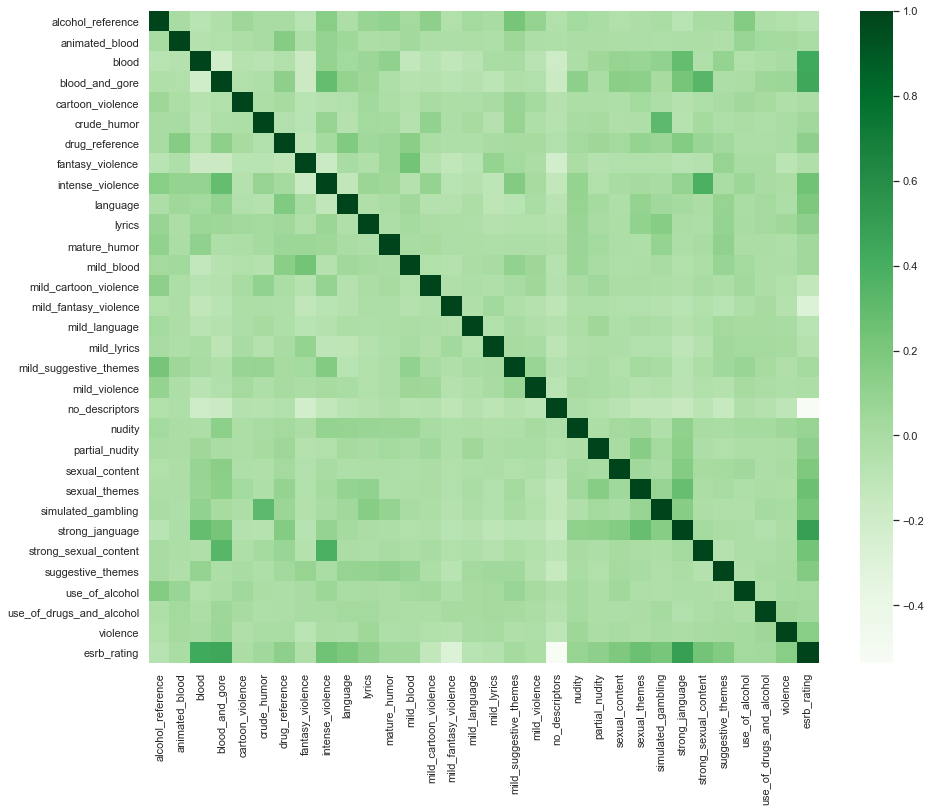

In [6]:
# correlation
# size
plt.figure(figsize=(15, 12))

useless_cols = ["title", "console"] 
corr_data = main_data.drop(useless_cols, axis = 1)

encode = {'E' : 0,
          'ET': 1,
          'T' : 2,
          'M' : 3}

corr_data["esrb_rating"] = corr_data["esrb_rating"].map(encode)

corr_cols = list(corr_data.columns)

main_correlation = corr_data[corr_cols].corr()
sns.heatmap(main_correlation, annot = False, cmap = "Greens")

Here we can see that:

• Columns like Blood, Blood and Gore, Strong Language have strong positive correlation with ESRB rating.

• But nudity, use of drugs and alcohol have really low correlation.


Blood :

Text(0.5, 1.0, 'Is there blood?')

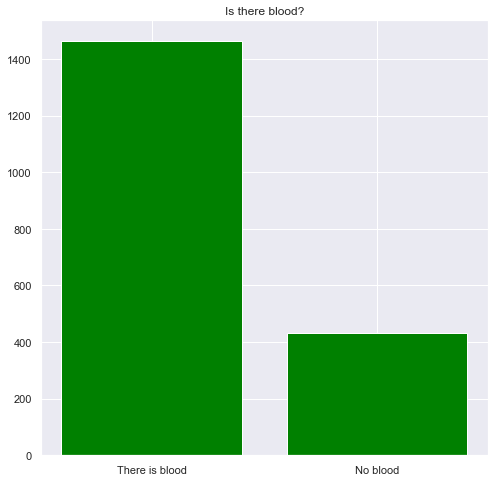

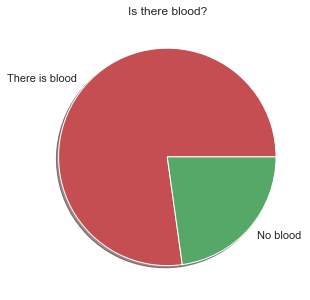

In [7]:
# about blood in video games
plt.figure(figsize=(8, 8))
blood_labels = ["There is blood", "No blood"]

blood_0 = main_data[main_data["blood"] == 0]
blood_1 = main_data[main_data["blood"] == 1]

blood_names = [len(blood_0), len(blood_1)]

plt.bar(blood_labels, blood_names, color = "green")
plt.title("Is there blood?")

plt.figure(figsize=(19, 5))
plt.pie(blood_names, labels = blood_labels, shadow = True, colors = "rgbyc")
plt.title("Is there blood?")

Here we can see that:

• There are more games with blood scenes than without it.

• There are more than 1400 computer games with blood scenes in this dataframe.

Blood and Gore:

Text(0.5, 1.0, 'Is there blood and gore?')

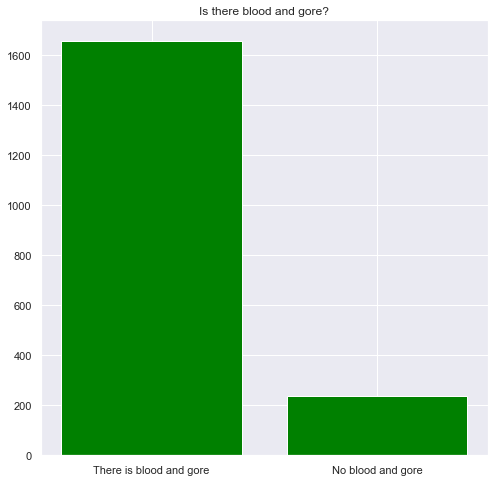

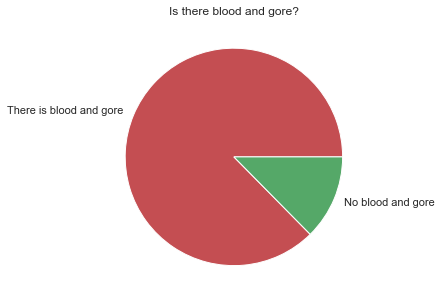

In [8]:
# blood and gore column
# size
plt.figure(figsize=(8, 8))
blood_and_gore_labels = ["There is blood and gore", "No blood and gore"]

blood_and_gore_0 = main_data[main_data["blood_and_gore"] == 0]
blood_and_gore_1 = main_data[main_data["blood_and_gore"] == 1]

blood_and_gore_names = [len(blood_and_gore_0), len(blood_and_gore_1)]

plt.bar(blood_and_gore_labels, blood_and_gore_names, color = "green")
plt.title("Is there blood and gore?")

plt.figure(figsize=(19, 5))
plt.pie(blood_and_gore_names, labels = blood_and_gore_labels,  colors = "rgbyc")
plt.title("Is there blood and gore?")

Here we can see that:

• There are more games with blood and gore scenes than without it.

• There are more than 1600 computer games with blood and gore scenes in this data frame.

And what about Strong Language:

Text(0.5, 1.0, 'Is there strong language?')

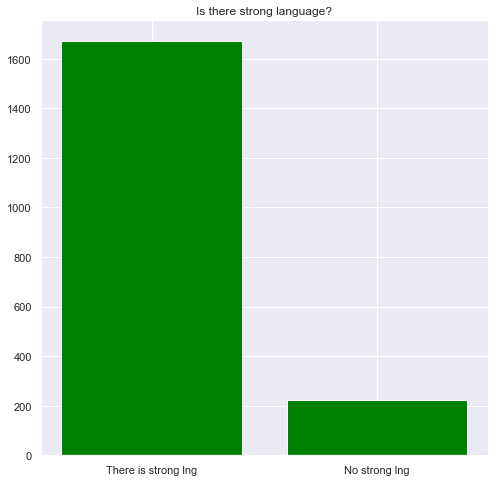

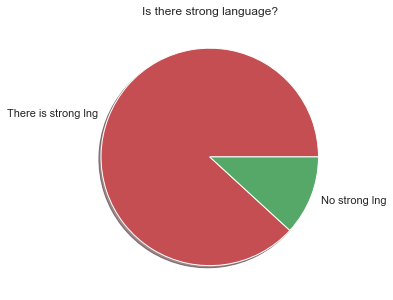

In [9]:
# about strong language
# size
plt.figure(figsize=(8, 8))
strong_lg_labels = ["There is strong lng", "No strong lng"]

strong_lg_0 = main_data[main_data["strong_janguage"] == 0]
strong_lg_1 = main_data[main_data["strong_janguage"] == 1]

strong_lg_names = [len(strong_lg_0), len(strong_lg_1)]

plt.bar(strong_lg_labels, strong_lg_names, color = "green")
plt.title("Is there strong language?")

plt.figure(figsize=(19, 5))
plt.pie(strong_lg_names, labels = strong_lg_labels, shadow = True, colors = "rgbyc")
plt.title("Is there strong language?")

Here we can see that:

• There are more games with strong language scenes than without it.

• There are more than 1600 computer games with strong language scenes in this data frame.

Well, lets go to rating column. If carefully look at this column we can see that there are only 4 unique values. E, M, T, ET. That`s why I will prepare lists only for these four values.

Text(0.5, 1.0, 'Rating distribution')

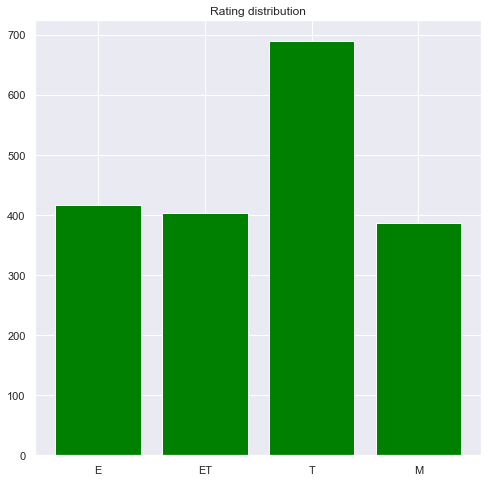

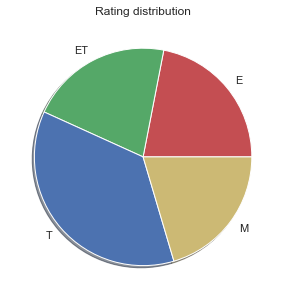

In [10]:
# ratings
# size
plt.figure(figsize=(8, 8))
rating_labels = ["E", "ET", "T", "M"]

E_rating = main_data[main_data["esrb_rating"] == "E"]
ET_rating = main_data[main_data["esrb_rating"] == "ET"]
T_rating = main_data[main_data["esrb_rating"] == "T"]
M_rating = main_data[main_data["esrb_rating"] == "M"]

rating_names = [len(E_rating), len(ET_rating), len(T_rating), len(M_rating)]

plt.bar(rating_labels, rating_names, color = "green")
plt.title("Rating distribution")

plt.figure(figsize=(19, 5))
plt.pie(rating_names, labels = rating_labels, shadow = True, colors = "rgbyc")
plt.title("Rating distribution")

Here we can see that:

• There are a lot of games with rating T, but not so many games with rating M and ET.

• Also, we can see that about half of all games are with rating T (~690), games with E and ET ratings are about 410 – 400 and games for matures are only about 390.

# 5) Conclusion of Analyzing.

In conclusion I can say that we did good job. We analyze this data and understand that correlation of strong language, blood and gore between ESRB rating is strong positive, but correlation of for example nudity is not really strong (by information in this data frame). Also, we visualized information from many columns and learn a lot of interesting information. 

# Prediction part.

Our task is to predict ESRB ratings of games in test data. So, after analysis this data we understand that there we can use classifier models to predict it.

# 1) Prepare data.

Let’s reload out data to train data frame and test data frame. 
After we did it, we can split data. To use it we wont use train_test_split because we can do it easier with Numpy.

In [14]:
# load data
train_df = pd.read_csv(r"C:\Users\prash\OneDrive\Documents\dataset\VedioGames_ESRP_RATING_Dataset\Video_games_esrb_rating.csv")
test_df = pd.read_csv(r"C:\Users\prash\OneDrive\Documents\dataset\VedioGames_ESRP_RATING_Dataset\test_esrb.csv")

# split the data
x_train = np.array(train_df[train_df.columns[2:-1]])
y_train = np.array(train_df[train_df.columns[-1]])

x_test = np.array(test_df[test_df.columns[2:-1]])
y_test = np.array(test_df[test_df.columns[-1]])

# 2) Modelling

In [15]:
#metric
from sklearn.metrics import accuracy_score

In [16]:
# 1)
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier version 1 model
dct1_model = DecisionTreeClassifier()

dct1_model.fit(x_train, y_train)
dct1_pred = dct1_model.predict(x_test)

dct1_pred_score_1 = accuracy_score(y_test, dct1_pred)

print("Prediction list of first dct: ", dct1_pred[:5] )
print("Score of first dct: ", dct1_pred_score_1)

Prediction list of first dct:  ['T' 'E' 'ET' 'E' 'ET']
Score of first dct:  0.826


First model is simple Decision Tree Classifier.
It is having not bad accuracy score: 0.82. How we can see Decision Tree Classifier is really good at this dataset. That’s why let’s check Random Forest Classifier score.

In [17]:
# 2)
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier vesion 1 model
rfc_1_model = RandomForestClassifier()

rfc_1_model.fit(x_train, y_train)
rfc_1_pred = rfc_1_model.predict(x_test)

rfc_1_pred_score_1 = accuracy_score(y_test, rfc_1_pred)

print("Prediction list of rfc: ", rfc_1_pred[:5])
print("Score of rfc: ", rfc_1_pred_score_1)

Prediction list of rfc:  ['T' 'E' 'M' 'E' 'ET']
Score of rfc:  0.856


Random Forest Classifier is better than Decision Tree here, because it is having 0.85 of accuracy score.



# 3) Conclusion of prediction.

Decision Tree Classifier has 0.82 accuracy score

Random Forest Classifier has 0.85 accuracy score (our “winner”)


Well, here we created two models, compared them, saw results and understanded that machine learning model can predict ESRB rating of games very well.

Thank you everyone who check this notebook, especially to author of this dataset, because I always want to do work like this. If you like my notebook upvote it and if you dislike, please, write your comments it will help me to improve my skills. 
Good luck! 